In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 18})
import seaborn as sns
import regex as re
import os
import numpy as np
from ast import literal_eval

In [2]:
plt.rcParams.update({'font.size': 24})

In [3]:
! cd ../results && pwd && find ~+ -type f -name "parameters.txt"

/mnt/extra/continuous-training/results
/mnt/extra/continuous-training/results/1717700456995308991/parameters.txt
/mnt/extra/continuous-training/results/1717444793172840349/parameters.txt
/mnt/extra/continuous-training/results/1717705984940495539/parameters.txt
/mnt/extra/continuous-training/results/1717575413839183617/parameters.txt
/mnt/extra/continuous-training/results/1717467553842856231/parameters.txt
/mnt/extra/continuous-training/results/1717575369578062901/parameters.txt
/mnt/extra/continuous-training/results/1717579388065196179/parameters.txt
/mnt/extra/continuous-training/results/1717701022363026467/parameters.txt
/mnt/extra/continuous-training/results/1717608769994081703/parameters.txt
/mnt/extra/continuous-training/results/1717579439091810476/parameters.txt
/mnt/extra/continuous-training/results/1717587649593441377/parameters.txt
/mnt/extra/continuous-training/results/1717700529336249757/parameters.txt
/mnt/extra/continuous-training/results/1717635454957034095/parameters.txt

In [4]:
result_paths = [
    "/mnt/extra/continuous-training/results/1717700456995308991/parameters.txt",
    "/mnt/extra/continuous-training/results/1717444793172840349/parameters.txt",
    "/mnt/extra/continuous-training/results/1717705984940495539/parameters.txt",
    "/mnt/extra/continuous-training/results/1717575413839183617/parameters.txt",
    "/mnt/extra/continuous-training/results/1717467553842856231/parameters.txt",
    "/mnt/extra/continuous-training/results/1717575369578062901/parameters.txt",
    "/mnt/extra/continuous-training/results/1717579388065196179/parameters.txt",
    "/mnt/extra/continuous-training/results/1717701022363026467/parameters.txt",
    "/mnt/extra/continuous-training/results/1717608769994081703/parameters.txt",
    "/mnt/extra/continuous-training/results/1717579439091810476/parameters.txt",
    "/mnt/extra/continuous-training/results/1717587649593441377/parameters.txt",
    "/mnt/extra/continuous-training/results/1717700529336249757/parameters.txt",
    "/mnt/extra/continuous-training/results/1717635454957034095/parameters.txt",
    # "/mnt/extra/continuous-training/results/1717446231823791885/parameters.txt",
    "/mnt/extra/continuous-training/results/1717448773806529718/parameters.txt",
    "/mnt/extra/continuous-training/results/1717612290915437273/parameters.txt",
    "/mnt/extra/continuous-training/results/1717594617566228467/parameters.txt",
    "/mnt/extra/continuous-training/results/1717478686265173993/parameters.txt",
    "/mnt/extra/continuous-training/results/1717619549666300929/parameters.txt",
    "/mnt/extra/continuous-training/results/1717704913915861438/parameters.txt",
    "/mnt/extra/continuous-training/results/1717456543236185969/parameters.txt",
    "/mnt/extra/continuous-training/results/1717715829899615491/parameters.txt",
]

In [5]:
stats_df = pd.DataFrame(columns=['folder_path', 'algo', 'param_path', 'csv_path', 'latencies_path', 'num_retrain', 'training_time_total', 'training_time_single', 'training_cpu_time', 'training_counter', 'inference_time_total', 'inference_time_single', 'inference_cpu_time', 'inference_counter'])
for stat in result_paths:
    contents = []
    with open(stat, "r") as f:
        contents = f.readlines()
    # Iterate to get variables
    folder_path = ''
    algo_name = ''
    csv_path = ''
    latencies_path = ''
    param_path = stat
    valid_entry = False
    retrained = -1
    training_time_total = -1
    training_time_single = -1
    training_cpu_time = -1
    training_counter = -1
    inference_time_total = -1
    inference_time_single = -1
    inference_cpu_time = -1
    inference_counter = -1
    for content in contents:
        if not valid_entry and 'Inference' in content:
            valid_entry = True
        if 'Output' in content:
            try:
                folder_path = content.split('Output = ')[1].split('\n')[0]
            except:
                folder_path = content.split('Output =')[1].split('\n')[0]
            latencies_path = os.path.join(folder_path, 'latencies.csv')
        if '-output' in content:
            try:
                algo_name = content.split(' = ')[1].split('\n')[0]
            except:
                algo_name = content.split('=')[1].split('\n')[0]
            csv_path = os.path.join(algo_name+'.csv')
        if 'Retrained' in content:
            retrained = float(content.split(' = ')[1].split('\n')[0])
        if 'Training time total' in content:
            training_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Training time single' in content:
            training_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Training CPU times usage' in content:
            training_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Training counter' in content:
            training_counter = float(content.split(' = ')[1].split('\n')[0])
        if 'Inference time total' in content:
            inference_time_total = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference time single' in content:
            inference_time_single = float(content.split(' = ')[1].split(' s')[0])
        if 'Inference CPU times usage' in content:
            inference_cpu_time = float(content.split(' = ')[1].split(' sCPU')[0])
        if 'Inference counter' in content:
            inference_counter = float(content.split(' = ')[1].split('\n')[0])
    if valid_entry:
        stats_df.loc[len(stats_df)] = [folder_path, algo_name, param_path, csv_path, latencies_path, retrained, training_time_total, training_time_single, training_cpu_time, training_counter, inference_time_total, inference_time_single, inference_cpu_time, inference_counter]
stats_df

,folder_path,algo,param_path,csv_path,latencies_path,num_retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain.csv,/mnt/extra/continuous-training/results/1717700...,0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based.csv,/mnt/extra/continuous-training/results/1717444...,9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor.csv,/mnt/extra/continuous-training/results/1717705...,0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0
3,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi.csv,/mnt/extra/continuous-training/results/1717575...,0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
4,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile.csv,/mnt/extra/continuous-training/results/1717467...,0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
5,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl.csv,/mnt/extra/continuous-training/results/1717575...,479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
6,/mnt/extra/continuous-training/results/1717579...,nn_period_8,/mnt/extra/continuous-training/results/1717579...,nn_period_8.csv,/mnt/extra/continuous-training/results/1717579...,60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
7,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt.csv,/mnt/extra/continuous-training/results/1717701...,0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
8,/mnt/extra/continuous-training/results/1717608...,nn_clf_js,/mnt/extra/continuous-training/results/1717608...,nn_clf_js.csv,/mnt/extra/continuous-training/results/1717608...,187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
9,/mnt/extra/continuous-training/results/1717579...,nurd,/mnt/extra/continuous-training/results/1717579...,nurd.csv,/mnt/extra/continuous-training/results/1717579...,-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0


In [11]:
values_df = pd.DataFrame({
    'path': pd.Series(dtype='string'),
    'algo': pd.Series(dtype='string'),
    'length': pd.Series(dtype='int'),
    'f1': pd.Series(dtype='object'),
    'roc_auc': pd.Series(dtype='object'),
    'latencies_acc': pd.Series(dtype='object'),
    'latencies_rej': pd.Series(dtype='object'),
    'retrain': pd.Series(dtype='int'),
    'training_time_total': pd.Series(dtype='float'),
    'training_time_single': pd.Series(dtype='float'),
    'training_cpu_time': pd.Series(dtype='float'),
    'training_counter': pd.Series(dtype='int'),
    'inference_time_total': pd.Series(dtype='float'),
    'inference_time_single': pd.Series(dtype='float'),
    'inference_cpu_time': pd.Series(dtype='float'),
    'inference_counter': pd.Series(dtype='int'),
})

for i, row in stats_df.iterrows():
    temp_df = pd.read_csv(os.path.join(row['folder_path'], row['csv_path']), index_col=0)
    temp_df = temp_df.drop_duplicates(subset='minute', keep="last")
    retrain_list = temp_df['retrain'].tolist()
    retrain = [i for i in retrain_list if i==True]
    latencies_df = pd.read_csv(row['latencies_path'], header=None, names=['latency', 'reject'], dtype={'latency': int, 'reject': str})
    latencies_acc = latencies_df[latencies_df['reject'].isin(["0", "True"])]['latency'].tolist()
    latencies_rej = latencies_df[latencies_df['reject'].isin(["1", "False"])]['latency'].tolist()
    # if temp_df['minute'].max() == 480:
    # if i != 3:
    #     values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist()[:-5], temp_df['roc_auc'].tolist()[:-5], row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]
    # else:
    values_df.loc[len(values_df)] = [row['folder_path'], row['algo'], temp_df['minute'].max(), temp_df['f1_score'].tolist(), temp_df['roc_auc'].tolist(), latencies_acc, latencies_rej, row['num_retrain'], row['training_time_total'], row['training_time_single'], row['training_cpu_time'], row['training_counter'], row['inference_time_total'], row['inference_time_single'], row['inference_cpu_time'], row['inference_counter']]

# print(values_df.iloc[13]['path'])
# values_df.drop([13], inplace=True)
values_df.reset_index(inplace=True, drop=True)
# values_df.to_csv('values_all_minmax.csv')
values_df

,path,algo,length,f1,roc_auc,latencies_acc,latencies_rej,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...","[122, 335, 210, 776, 697, 224, 360, 194, 211, ...","[199, 699, 117, 392, 263, 390, 273, 247, 220, ...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
1,/mnt/extra/continuous-training/results/1717444...,nn_clf_ip_based,480,"[0.9167082654370858, 0.9141628534509446, 0.903...","[0.7888175926597607, 0.7873075904653973, 0.794...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 194, 211, 137, 285, 67, 411, 59, 93...",9.0,582.992192,58.299219,1725.61,10.0,9826.975631,2.489002e-05,31892.29,394815847.0
2,/mnt/extra/continuous-training/results/1717705...,dt_clf_noretrain_5monitor,476,"[0.9994849988248726, 0.8963740085255608, 0.892...","[0.9994138156517904, 0.7935881260998761, 0.787...","[122, 335, 210, 776, 697, 224, 360, 194, 211, ...","[199, 699, 117, 392, 263, 390, 273, 247, 220, ...",0.0,7.406685,7.406685,18.26,1.0,125.934814,3.213507e-07,163.70,391892160.0
3,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 211, 137, 67, 411, 93, 299, 39...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0
4,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,480,"[0.9183009053653396, 0.9157776382569456, 0.904...","[0.7899124647384557, 0.7880965327779492, 0.795...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 285, 67, 411, 93, 299, 39...",0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
5,/mnt/extra/continuous-training/results/1717575...,nn_clf_kl,480,"[0.9148132108923608, 0.9157947436186836, 0.904...","[0.7732485379714995, 0.7984171487014365, 0.842...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 211, 137, 67, 411, 488, 93, 299, 39...",479.0,20196.405196,42.075844,102592.25,480.0,7998.590941,2.025904e-05,32207.66,394815847.0
6,/mnt/extra/continuous-training/results/1717579...,nn_period_8,480,"[0.9172867523784136, 0.9144861202224176, 0.903...","[0.790789952793865, 0.7889673387135964, 0.7956...","[122, 199, 699, 117, 392, 263, 390, 273, 247, ...","[335, 360, 194, 230, 211, 137, 285, 67, 411, 4...",60.0,2697.606778,44.223062,16688.89,61.0,10685.934880,2.706562e-05,55504.60,394815847.0
7,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...","[229, 171, 76, 256, 133, 91, 230, 212, 182, 17...","[413, 187, 220, 180, 78, 72, 394, 146, 317, 71...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
8,/mnt/extra/continuous-training/results/1717608...,nn_clf_js,480,"[0.918882039947814, 0.9162108233675476, 0.9055...","[0.7959408052069242, 0.7935271401629446, 0.800...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 211, 137, 67, 411, 488, 93, 299, 39...",187.0,8183.487942,43.529191,39744.92,188.0,10674.916581,2.703771e-05,46866.09,394815847.0
9,/mnt/extra/continuous-training/results/1717579...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 250, 233, 354, 416, 142, 677, 210, 91, 7...",-1.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0


In [ ]:
# values_df = pd.read_csv('values_all.csv', index_col=0)
# values_df['f1'] = values_df['f1'].apply(literal_eval)
# values_df['roc_auc'] = values_df['roc_auc'].apply(literal_eval)
# values_df

In [12]:
algorithms_name = {
    "nn_clf_ks": "KS-Test",
    "nn_period_8": "8min",
    "nn_period_4": "4min",
    "nn_clf_psi": "PSI",
    "nn_clf_noretrain": "NoRetrain-NN",
    "nn_clf_outlier": "Outlier",
    "nn_clf_ph": "PageHinkley",
    "nn_period_2": "2min",
    "nn_clf_ip_based": "IP-based",
    "nn_period_1": "1min",
    "model_zoo_sample": "Reuse-NN",
    "model_zoo_sample_dt": "Reuse-DT",
    "nn_clf_js": "JS-Div",
    "nn_clf_quartile": "Quartile",
    "nn_clf_labeler": "Labeler",
    "nn_clf_kl": "KL-Div",
    "nurd": "Reweight",
    "dt_clf_noretrain": "NoRetrain-DT",
    "nn_clf_dd_nn": "ModelDD",
    "dt_clf_noretrain_2monitor": "NoRetrain-DT2",
    "dt_clf_noretrain_5monitor": "NoRetrain-DT5",
}

algorithms_color = {
    "nn_clf_ks": "darkgreen",
    "nn_period_8": "red",
    "nn_period_4": "indianred",
    "nn_clf_psi": "forestgreen",
    "nn_clf_noretrain": "grey",
    "nn_clf_outlier": "orange",
    "nn_clf_ph": "limegreen",
    "nn_period_2": "brown",
    "nn_clf_ip_based": "gold",
    "nn_period_1": "darkred",
    "model_zoo_sample": "blueviolet",
    "model_zoo_sample_dt": "violet",
    "nn_clf_js": "lime",
    "nn_clf_quartile": "goldenrod",
    "nn_clf_labeler": "darkorange",
    "nn_clf_kl": "lawngreen",
    "nurd": "hotpink",
    "dt_clf_noretrain": "black",
    "nn_clf_dd_nn": "magenta",
    "dt_clf_noretrain_2monitor": "dimgrey",
    "dt_clf_noretrain_5monitor": "silver",
}

algorithms_marker = {
    "nn_clf_ks": "*",
    "nn_period_8": "X",
    "nn_period_4": ",",
    "nn_clf_psi": "D",
    "nn_clf_noretrain": 9,
    "nn_clf_outlier": "o",
    "nn_clf_ph": "x",
    "nn_period_2": "v",
    "nn_clf_ip_based": "+",
    "nn_period_1": "1",
    "model_zoo_sample": ".",
    "model_zoo_sample_dt": "8",
    "nn_clf_js": "^",
    "nn_clf_quartile": "<",
    "nn_clf_labeler": ">",
    "nn_clf_kl": "P",
    "nurd": "o",
    "dt_clf_noretrain": "p",
    "nn_clf_dd_nn": "2",
    "dt_clf_noretrain_2monitor": "3",
    "dt_clf_noretrain_5monitor": "4",
}

# #Retrain against Rough Accuracy Distribution

In [13]:
df_plot = pd.DataFrame(columns=['algo', 'id', 'retrain', 'low', 'open', 'close', 'high', 'inference_cpu_time'])

for i, row in values_df.iterrows():
    df_plot.loc[len(df_plot)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], np.percentile(row['roc_auc'], 1)*100, np.percentile(row['roc_auc'], 25)*100, np.percentile(row['roc_auc'], 75)*100, np.percentile(row['roc_auc'], 99)*100, row['inference_cpu_time']]

df_plot.sort_values(by=['retrain', 'open', 'close'], ascending=[True, True, True], inplace=True)
df_plot.reset_index(inplace=True, drop=True)
df_plot.loc[df_plot['algo'] == 'nurd', 'retrain'] = 0
df_plot

,algo,id,retrain,low,open,close,high,inference_cpu_time
0,nurd,Reweight,0.0,50.513669,51.952601,53.817150,56.105407,6156.50
1,nn_clf_psi,PSI,0.0,62.481199,66.689735,77.489404,82.771312,55048.01
2,nn_clf_outlier,Outlier,0.0,62.481483,66.868585,77.715319,82.703733,32860.70
3,model_zoo_sample_dt,Reuse-DT,0.0,63.443935,67.464293,70.706838,73.617423,481.71
4,nn_clf_noretrain,NoRetrain-NN,0.0,63.138335,67.487150,77.895320,83.212081,10950.17
5,nn_clf_dd_nn,ModelDD,0.0,63.537687,67.970565,78.582847,83.354933,57326.43
6,nn_clf_quartile,Quartile,0.0,63.760605,68.171216,78.782209,83.771837,32595.75
7,model_zoo_sample,Reuse-NN,0.0,63.493595,71.661665,77.189738,80.646463,40850.90
8,dt_clf_noretrain,NoRetrain-DT,0.0,68.678594,72.898446,76.103050,79.515882,397.05
9,dt_clf_noretrain_2monitor,NoRetrain-DT2,0.0,68.795888,73.028789,76.060873,79.496351,271.50


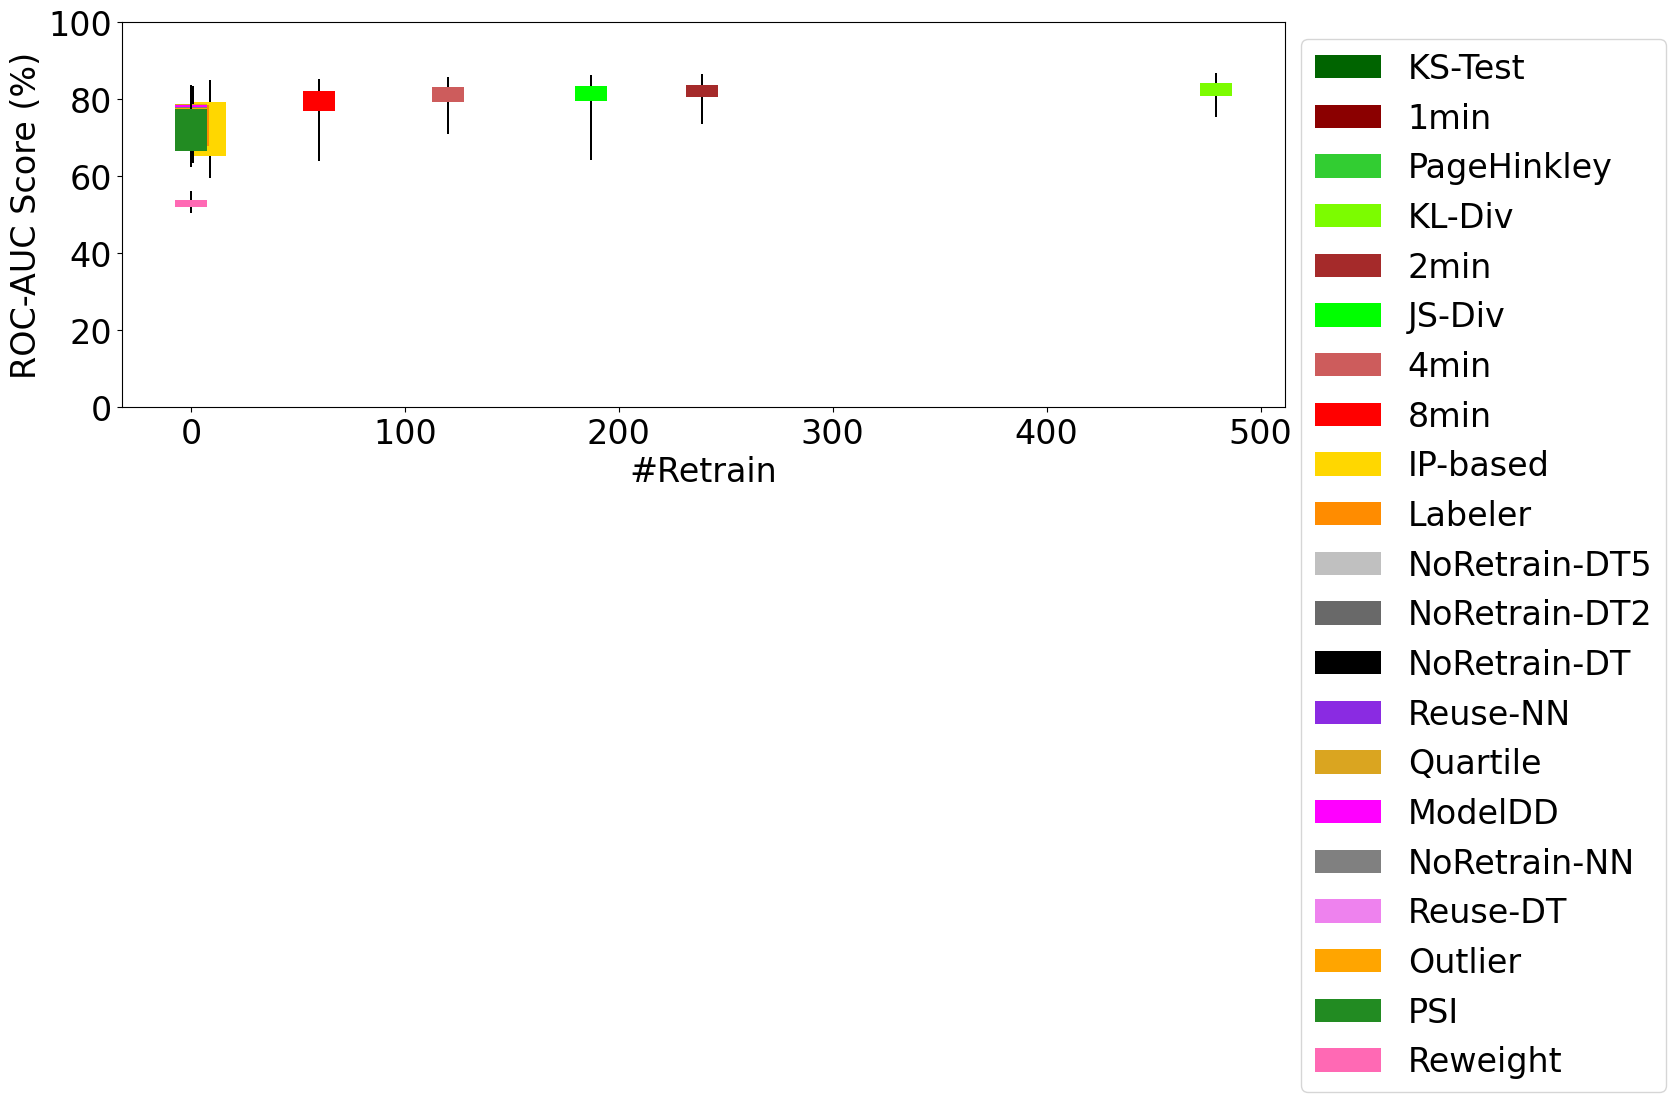

In [14]:
plt.figure(figsize=(15, 5))

# plt.xlim(-10, 500)
plt.xlabel('#Retrain')

plt.ylim(0, 100)
plt.ylabel('ROC-AUC Score (%)')

bar_width = 15
stick_width = 1

for index, row in df_plot[::-1].iterrows():
    # Bottom to top: LOCH (L-H), (O-C)
    plt.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
    plt.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
    plt.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

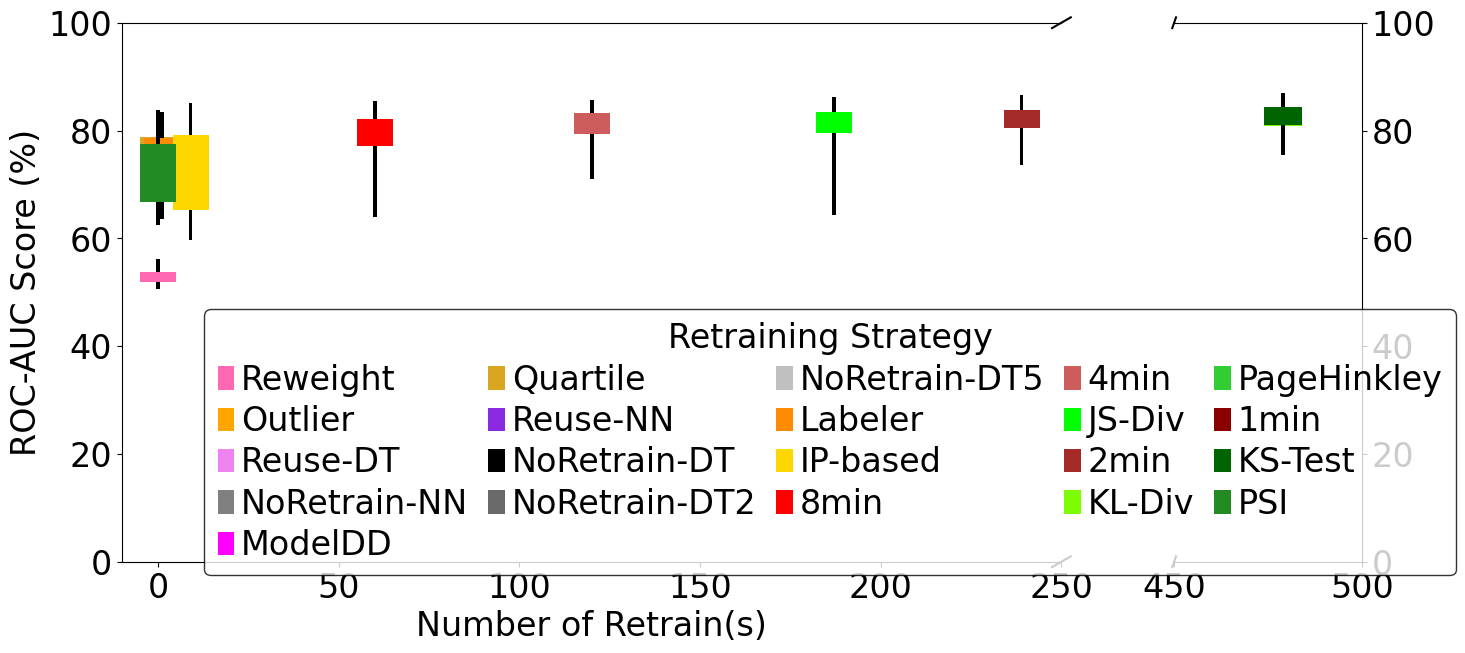

In [15]:
f, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7), gridspec_kw={'width_ratios': [5, 1]})

# plt.xlim(-100, df_plot['retrain'].max()+100)
ax.set_xlabel('Number of Retrain(s)')

# plt.ylim(0, 100)
ax.set_ylabel('ROC-AUC Score (%)')

bar_width = 10
stick_width = 1

for index, row in df_plot.iterrows():
    if index != 1:
        # Bottom to top: LOCH (L-H), (O-C)
        ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
        ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
        ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
        ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

row = df_plot.loc[1]

# Bottom to top: LOCH (L-H), (O-C)
ax.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick

ax2.bar(row.retrain, row.close-row.open, bar_width, row.open, color=algorithms_color[row['algo']], label=row['id']) # main bar
ax2.bar(row.retrain, row.low-row.open, stick_width, row.open, color='black') # left stick
ax2.bar(row.retrain, row.high-row.close, stick_width, row.close, color='black') # right stick
        
ax.set_xlim(-10, 250)
ax2.set_xlim(450, 500)
ax.set_ylim(0, 100)
ax2.set_ylim(0, 100)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

d = 0.01  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.legend(bbox_to_anchor=(-5.25, 0.5), loc="upper left",
           title="Retraining Strategy", alignment='center', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, 
           handletextpad=0.2, handlelength=0.5, ncol=5)

plt.show()

Insight #1: #Retrain is not perpendicular towards accuracy stability

# Distribution Violin Plot (which one is more plump?)

In [16]:
df_plot2 = values_df.copy(deep=True)
df_plot2.sort_values(by=['retrain'], ascending=[True], inplace=True)
df_plot2.reset_index(inplace=True, drop=True)
df_plot2.loc[df_plot2['algo'] == 'nurd', 'retrain'] = 0
df_plot2

,path,algo,length,f1,roc_auc,latencies_acc,latencies_rej,retrain,training_time_total,training_time_single,training_cpu_time,training_counter,inference_time_total,inference_time_single,inference_cpu_time,inference_counter
0,/mnt/extra/continuous-training/results/1717579...,nurd,480,"[0.0681294816331881, 0.0721397712738599, 0.066...","[0.513556243375378, 0.5144237185776803, 0.5134...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 250, 233, 354, 416, 142, 677, 210, 91, 7...",0.0,2268.060755,2268.060755,14153.80,1.0,891.047034,2.256867e-06,6156.50,394815847.0
1,/mnt/extra/continuous-training/results/1717700...,dt_clf_noretrain,480,"[0.9994849988248726, 0.8964198340028163, 0.885...","[0.9994138156517904, 0.7936983252156622, 0.796...","[122, 335, 210, 776, 697, 224, 360, 194, 211, ...","[199, 699, 117, 392, 263, 390, 273, 247, 220, ...",0.0,7.395818,7.395818,7.56,1.0,128.376732,3.251560e-07,397.05,394815847.0
2,/mnt/extra/continuous-training/results/1717704...,dt_clf_noretrain_2monitor,480,"[0.9994849988248726, 0.8964457631594483, 0.885...","[0.9994138156517904, 0.7935599505973587, 0.795...","[335, 210, 776, 697, 224, 360, 194, 211, 137, ...","[122, 199, 699, 117, 392, 263, 390, 273, 247, ...",0.0,7.440969,7.440969,19.47,1.0,125.007325,3.166219e-07,271.50,394815847.0
3,/mnt/extra/continuous-training/results/1717619...,model_zoo_sample,480,"[0.9141931885258774, 0.9107644550068624, 0.900...","[0.7808341997847024, 0.7517463458533266, 0.724...","[413, 187, 220, 180, 171, 76, 78, 72, 394, 256...","[229, 230, 71, 182, 60, 299, 393, 271, 55, 71,...",0.0,3959.367266,131.978909,22990.22,30.0,9761.476797,2.666125e-05,40850.90,366129722.0
4,/mnt/extra/continuous-training/results/1717700...,nn_clf_noretrain,480,"[0.9137089194892664, 0.9111484083506994, 0.899...","[0.7772600209413139, 0.775661755520527, 0.7829...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 224, 360, 211, 137, 67, 411, 488, 93, 29...",0.0,105.942696,105.942696,686.60,1.0,4794.631890,1.214397e-05,10950.17,394815847.0
5,/mnt/extra/continuous-training/results/1717456...,nn_clf_outlier,480,"[0.9144264618055424, 0.9116270794634672, 0.899...","[0.7752489134451712, 0.7729895915679161, 0.780...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 194, 211, 137, 67, 411, 93, 299, 39...",0.0,131.428284,131.428284,550.77,1.0,9639.783462,2.441590e-05,32860.70,394815847.0
6,/mnt/extra/continuous-training/results/1717701...,model_zoo_sample_dt,480,"[0.999868643940244, 0.8039533908113423, 0.7804...","[0.9998574806651472, 0.7064619429418658, 0.695...","[229, 171, 76, 256, 133, 91, 230, 212, 182, 17...","[413, 187, 220, 180, 78, 72, 394, 146, 317, 71...",0.0,240.152132,8.005071,781.03,30.0,185.076186,5.054935e-07,481.71,366129722.0
7,/mnt/extra/continuous-training/results/1717587...,nn_clf_dd_nn,480,"[0.917535585118758, 0.914870131699636, 0.90371...","[0.7898381877864555, 0.7876834436917228, 0.794...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[224, 360, 194, 211, 137, 67, 411, 488, 93, 29...",0.0,171.041479,171.041479,996.99,1.0,11449.620697,2.899990e-05,57326.43,394815847.0
8,/mnt/extra/continuous-training/results/1717467...,nn_clf_quartile,480,"[0.9183009053653396, 0.9157776382569456, 0.904...","[0.7899124647384557, 0.7880965327779492, 0.795...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[360, 194, 211, 137, 285, 67, 411, 93, 299, 39...",0.0,171.814933,171.814933,760.35,1.0,9729.766112,2.464381e-05,32595.75,394815847.0
9,/mnt/extra/continuous-training/results/1717575...,nn_clf_psi,480,"[0.914981888558092, 0.912084331385732, 0.90033...","[0.7757803722096196, 0.7734655107930415, 0.781...","[122, 199, 699, 117, 392, 263, 335, 390, 273, ...","[767, 360, 194, 211, 137, 67, 411, 93, 299, 39...",0.0,145.642166,145.642166,691.02,1.0,10833.957692,2.744053e-05,55048.01,394815847.0


In [17]:
flatten_f1 = pd.DataFrame(columns=['Algorithm', 'ROC-AUC'])
for i, row in df_plot2.iterrows():
    for f1 in row['roc_auc']:
        flatten_f1.loc[len(flatten_f1)] = [row['algo'], f1]
flatten_f1.head()

,Algorithm,ROC-AUC
0,nurd,0.513556
1,nurd,0.514424
2,nurd,0.513485
3,nurd,0.514654
4,nurd,0.515570


In [18]:
this_color = [algorithms_color[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_marker = [algorithms_marker[x] for x in flatten_f1['Algorithm'].unique().tolist()]
this_name = [algorithms_name[x]+'('+str(int(y))+')' for x, y in zip(df_plot2['algo'].tolist(), df_plot2['retrain'].tolist())]

In [19]:
plt.rcParams.update({'font.size': 18})

/tmp/ipykernel_1633008/1467160029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=this_color, ax=ax, linewidth=0.75)


/tmp/ipykernel_1633008/1467160029.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vp.set_xticklabels(this_name)


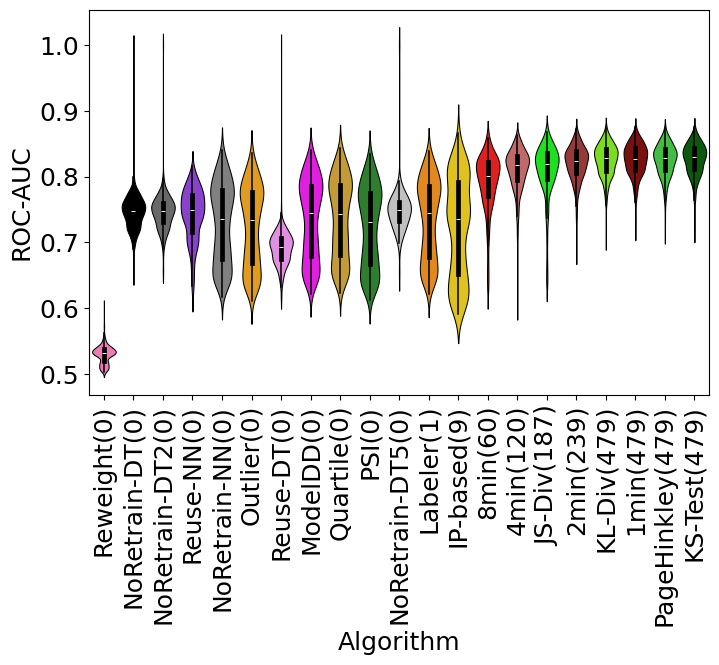

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))

vp = sns.violinplot(data=flatten_f1, x='Algorithm', y='ROC-AUC', palette=this_color, ax=ax, linewidth=0.75)
vp.set_xticklabels(this_name)
plt.xticks(rotation=90)
plt.show()

# Average F1 against inference overhead

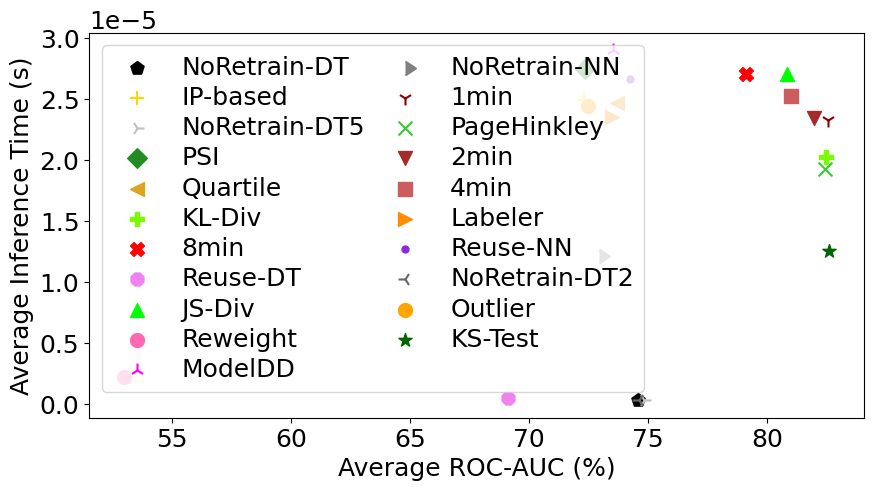

In [21]:
df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

for i, row in values_df.iterrows():
    df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['roc_auc'])/len(row['roc_auc']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

df_plot3['size'] = [100]*len(df_plot3)
df_plot3['marker'] = [algorithms_marker[x] for x in df_plot3['algo'].tolist()]

df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_time_single'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference Time (s)")

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

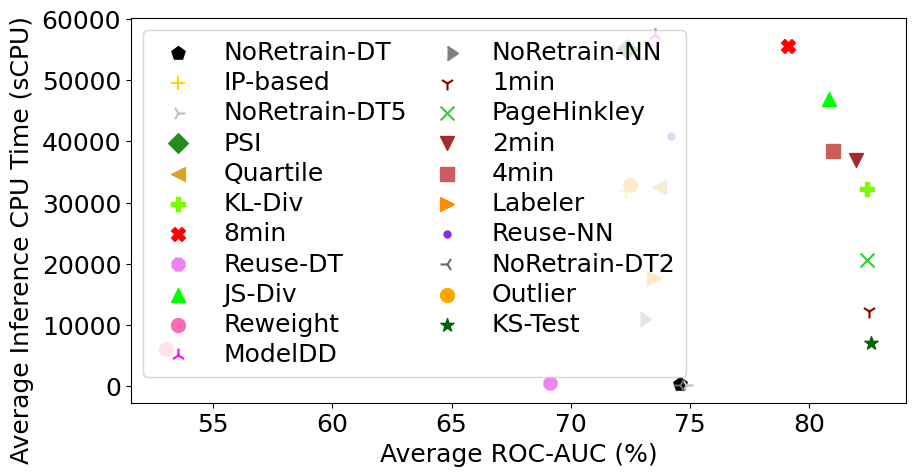

In [22]:
# df_plot3 = pd.DataFrame(columns=['algo', 'id', 'retrain', 'average', 'inference_cpu_time', 'inference_time_single', 'color'])

# for i, row in values_df.iterrows():
#     df_plot3.loc[len(df_plot3)] = [row['algo'], algorithms_name[row['algo']], row['retrain'], (sum(row['f1'])/len(row['f1']))*100, row['inference_cpu_time'], row['inference_time_single'], algorithms_color[row['algo']]]

# df_plot3['size'] = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
# df_plot3['marker'] = ['*', 'X', ',', 'D', 9, 'o', 'x', 'v', '+', '1', '.', '^', '<', '>', 'P', 'o']

# df_plot3.reset_index(inplace=True, drop=True)

fig, ax = plt.subplots(figsize = (10, 5))

for i, row in df_plot3.iterrows():
    plt.scatter(x=row['average'], y=row['inference_cpu_time'], s=row['size'], c=row['color'], label=row['id'], marker=row['marker'])
ax.set(xlabel ="Average ROC-AUC (%)", ylabel = "Average Inference CPU Time (sCPU)")
ax.yaxis.set_label_coords(-0.125, 0.425)

plt.legend(loc='best', ncol=2, labelspacing=0.25, columnspacing=0.6)

plt.show()

# 3. Improvement

In [23]:
df_plot4 = df_plot2.copy(deep=True)
df_plot4['id'] = df_plot4['algo'].apply(lambda x: algorithms_name[x])
print(df_plot4['algo'].tolist())
print(df_plot4['id'].tolist())

['nurd', 'dt_clf_noretrain', 'dt_clf_noretrain_2monitor', 'model_zoo_sample', 'nn_clf_noretrain', 'nn_clf_outlier', 'model_zoo_sample_dt', 'nn_clf_dd_nn', 'nn_clf_quartile', 'nn_clf_psi', 'dt_clf_noretrain_5monitor', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_clf_kl', 'nn_period_1', 'nn_clf_ph', 'nn_clf_ks']
['Reweight', 'NoRetrain-DT', 'NoRetrain-DT2', 'Reuse-NN', 'NoRetrain-NN', 'Outlier', 'Reuse-DT', 'ModelDD', 'Quartile', 'PSI', 'NoRetrain-DT5', 'Labeler', 'IP-based', '8min', '4min', 'JS-Div', '2min', 'KL-Div', '1min', 'PageHinkley', 'KS-Test']


In [24]:
df_plot4['id'].tolist()

['Reweight',
 'NoRetrain-DT',
 'NoRetrain-DT2',
 'Reuse-NN',
 'NoRetrain-NN',
 'Outlier',
 'Reuse-DT',
 'ModelDD',
 'Quartile',
 'PSI',
 'NoRetrain-DT5',
 'Labeler',
 'IP-based',
 '8min',
 '4min',
 'JS-Div',
 '2min',
 'KL-Div',
 '1min',
 'PageHinkley',
 'KS-Test']

In [25]:
f1s = df_plot4['roc_auc'].tolist()
print(len(f1s))

21


In [26]:
df_plot4['algo'].tolist()

['nurd',
 'dt_clf_noretrain',
 'dt_clf_noretrain_2monitor',
 'model_zoo_sample',
 'nn_clf_noretrain',
 'nn_clf_outlier',
 'model_zoo_sample_dt',
 'nn_clf_dd_nn',
 'nn_clf_quartile',
 'nn_clf_psi',
 'dt_clf_noretrain_5monitor',
 'nn_clf_labeler',
 'nn_clf_ip_based',
 'nn_period_8',
 'nn_period_4',
 'nn_clf_js',
 'nn_period_2',
 'nn_clf_kl',
 'nn_period_1',
 'nn_clf_ph',
 'nn_clf_ks']

In [27]:
for f1 in f1s:
    print(len(f1))

480
480
289
451
480
480
451
480
480
480
97
480
480
480
480
480
480
480
480
480
480


In [28]:
plot_df4 = pd.DataFrame(columns=[algo for idx, algo in enumerate(df_plot4['algo'].tolist()) if (idx != 4 and idx != 9)])

for i in range(35, 475):
    # print(i)
    # print(f1s[0][i])
    # print(f1s[1][i])
    # print(f1s[2][i-30])
    # print(f1s[3][i])
    # print(f1s[5][i-30])
    # print(f1s[6][i])
    # print(f1s[7][i])
    # print(f1s[8][i+5])
    # print(f1s[9][i])
    # print(f1s[10][i])
    # print(f1s[11][i])
    # print(f1s[12][i])
    # print(f1s[13][i])
    # print(f1s[14][i])
    # print(f1s[15][i])
    # print(f1s[16][i])
    # print(f1s[17][i])
    # print(f1s[18][i])
    plot_df4.loc[len(plot_df4)] = [f1s[0][i], f1s[1][i-30], f1s[2][i], f1s[3][i], f1s[5][i-30], f1s[6][i], f1s[7][i], f1s[8][i+5], f1s[10][i], f1s[11][i], f1s[12][i], f1s[13][i], f1s[14][i], f1s[15][i], f1s[16][i], f1s[17][i], f1s[18][i], f1s[19][i]]

plot_df4

ValueError: cannot set a row with mismatched columns

In [ ]:
plot_df = plot_df4.groupby(np.arange(len(plot_df4))//10).mean()
plot_df

,nurd,model_zoo_sample,nn_clf_noretrain,nn_clf_dd_nn,model_zoo_sample_dt,dt_clf_noretrain,nn_clf_quartile,nn_clf_psi,nn_clf_outlier,nn_clf_labeler,nn_clf_ip_based,nn_period_8,nn_period_4,nn_clf_js,nn_period_2,nn_clf_kl,nn_period_1,nn_clf_ph
0,0.527277,0.759862,0.757868,0.768929,0.702315,0.782853,0.768461,0.739175,0.755652,0.765415,0.824876,0.828624,0.820388,0.835478,0.825443,0.839878,0.839683,0.840831
1,0.536910,0.734842,0.726370,0.735063,0.717489,0.755766,0.732510,0.689647,0.723530,0.731146,0.805003,0.806038,0.799019,0.827213,0.823820,0.831765,0.832808,0.833154
2,0.533285,0.721720,0.677858,0.684758,0.704404,0.737338,0.687967,0.722898,0.671200,0.682819,0.764189,0.779466,0.797714,0.805283,0.798825,0.804030,0.802471,0.802071
3,0.540810,0.732406,0.711330,0.717302,0.709520,0.740785,0.719501,0.636785,0.706460,0.717172,0.782778,0.794257,0.798341,0.769506,0.804694,0.818164,0.818861,0.819202
4,0.541901,0.690729,0.706985,0.709359,0.678071,0.695921,0.711279,0.710143,0.702782,0.707877,0.756150,0.727778,0.812999,0.753004,0.824512,0.822920,0.821399,0.821566
5,0.537700,0.704283,0.649084,0.653462,0.708948,0.719692,0.655555,0.714412,0.641836,0.653322,0.756655,0.743753,0.771169,0.785750,0.785697,0.795816,0.794527,0.794750
6,0.517070,0.765789,0.791094,0.796013,0.669022,0.755219,0.799480,0.707241,0.786962,0.795768,0.797642,0.787650,0.812913,0.837640,0.825497,0.837522,0.838811,0.837025
7,0.533221,0.721682,0.696596,0.702989,0.698775,0.736923,0.704264,0.741905,0.692679,0.701644,0.680366,0.767171,0.801203,0.815809,0.806936,0.815947,0.813626,0.813944
8,0.534750,0.727214,0.737407,0.747854,0.704243,0.765436,0.746120,0.758105,0.735261,0.743338,0.713177,0.826542,0.842759,0.843757,0.844750,0.846682,0.847540,0.846623
9,0.517274,0.764238,0.790203,0.797989,0.685742,0.760887,0.800654,0.773962,0.786254,0.796777,0.790532,0.821288,0.836726,0.838708,0.831819,0.839869,0.839326,0.839609


In [ ]:
print(plot_df.columns.tolist())

['nurd', 'model_zoo_sample', 'nn_clf_noretrain', 'nn_clf_dd_nn', 'model_zoo_sample_dt', 'dt_clf_noretrain', 'nn_clf_quartile', 'nn_clf_psi', 'nn_clf_outlier', 'nn_clf_labeler', 'nn_clf_ip_based', 'nn_period_8', 'nn_period_4', 'nn_clf_js', 'nn_period_2', 'nn_clf_kl', 'nn_period_1', 'nn_clf_ph']


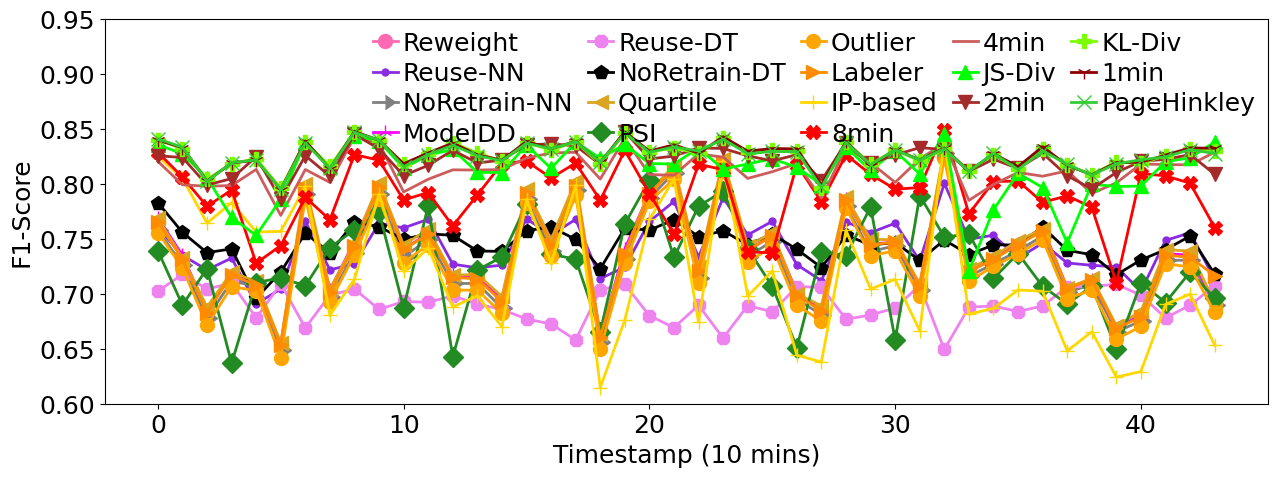

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
# plot_df.plot()
for col in plot_df[::-1].columns:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=2, marker=algorithms_marker[col], markersize=10)
plt.legend(ncol=5, loc="best",
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.95)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 16})

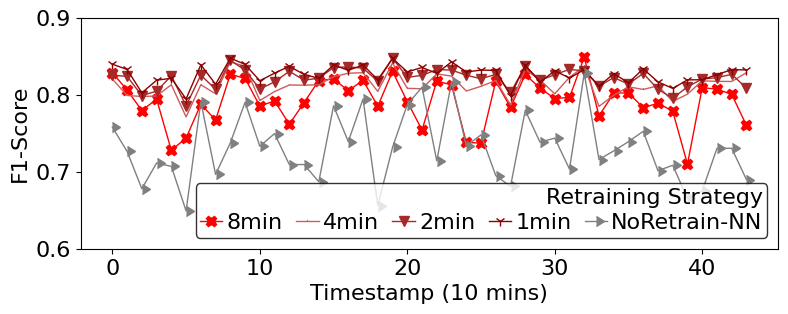

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_period_8', 'nn_period_4', 'nn_period_2', 'nn_period_1', 'nn_clf_noretrain']:
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=5, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

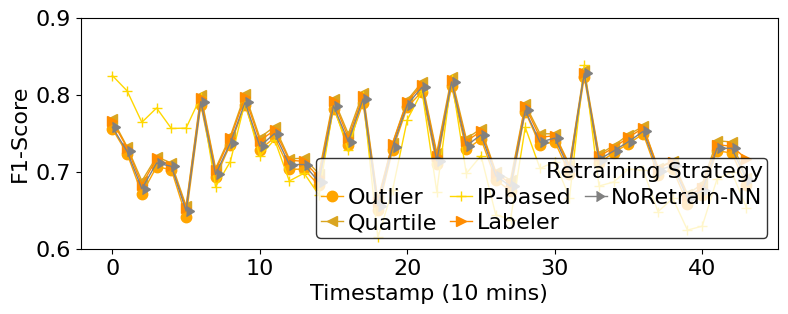

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_outlier', 'nn_clf_quartile', 'nn_clf_ip_based', 'nn_clf_labeler', 'nn_clf_noretrain']: # 
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

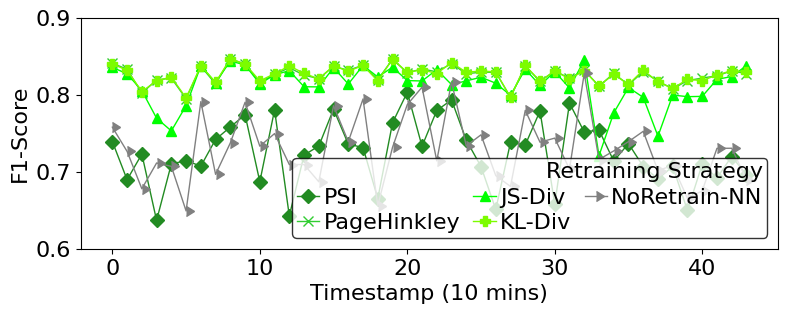

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['nn_clf_psi', 'nn_clf_ph', 'nn_clf_js', 'nn_clf_kl', 'nn_clf_noretrain']: #'nn_clf_ks', 
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=3, loc="lower right",
           title="Retraining Strategy", alignment='right', 
           frameon=True, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

In [ ]:
# /mnt/extra/continuous-training/results/1716763301509528146/dt_clf_noretrain.csv

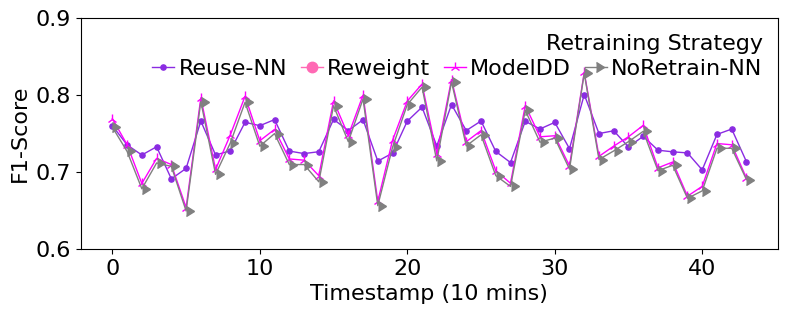

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['model_zoo_sample', 'nurd', 'nn_clf_dd_nn', 'nn_clf_noretrain']: #, 'dt_clf_noretrain', 'model_zoo_sample_dt'
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=4, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

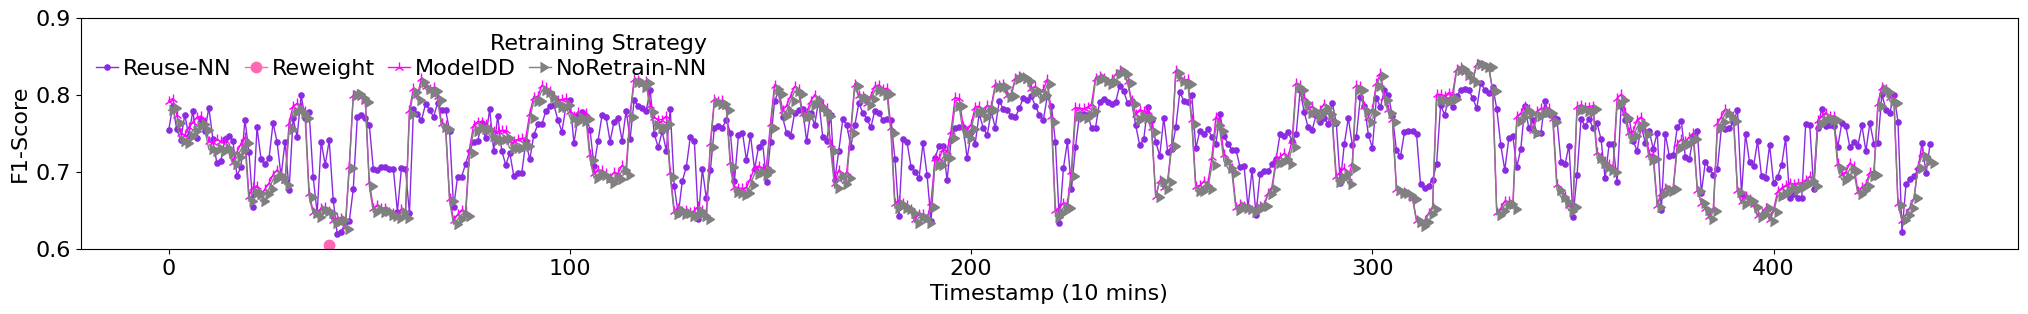

In [ ]:
fig, ax = plt.subplots(figsize=(25, 3))
# plot_df4.plot()
for col in ['model_zoo_sample', 'nurd', 'nn_clf_dd_nn', 'nn_clf_noretrain']: #, 'dt_clf_noretrain', 'model_zoo_sample_dt'
    plt.plot(plot_df4.index, plot_df4[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=4, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()

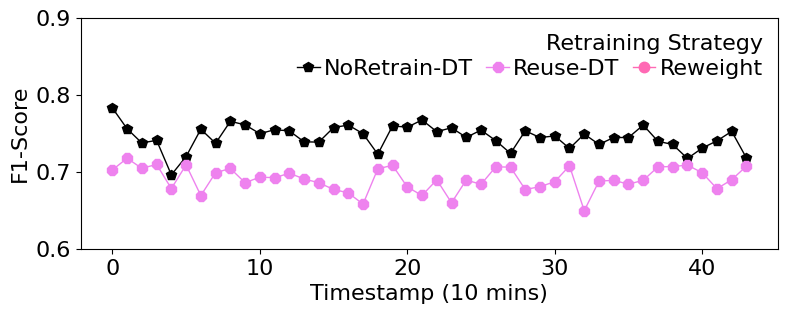

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
# plot_df.plot()
for col in ['dt_clf_noretrain', 'model_zoo_sample_dt', 'nurd']: #
    plt.plot(plot_df.index, plot_df[col], label=algorithms_name[col], color=algorithms_color[col], linewidth=1, marker=algorithms_marker[col], markersize=7.5)
plt.legend(ncol=4, loc="best",
           title="Retraining Strategy", alignment='right', 
           frameon=False, facecolor=(1, 1, 1, 0), 
           edgecolor='black', labelspacing=0.25, columnspacing=0.6, borderpad=0.2, 
           handletextpad=0.2, handlelength=1)
plt.ylim(0.6, 0.9)
plt.xlabel('Timestamp (10 mins)')
plt.ylabel('F1-Score')
plt.show()